In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('kddcup99.csv')

In [3]:
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [4]:
dataset['flag'].value_counts()

SF        378439
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [5]:
dataset['label'].value_counts()

smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64

In [6]:
dataset['protocol_type'].value_counts()

icmp    283602
tcp     190064
udp      20354
Name: protocol_type, dtype: int64

In [7]:
dataset.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

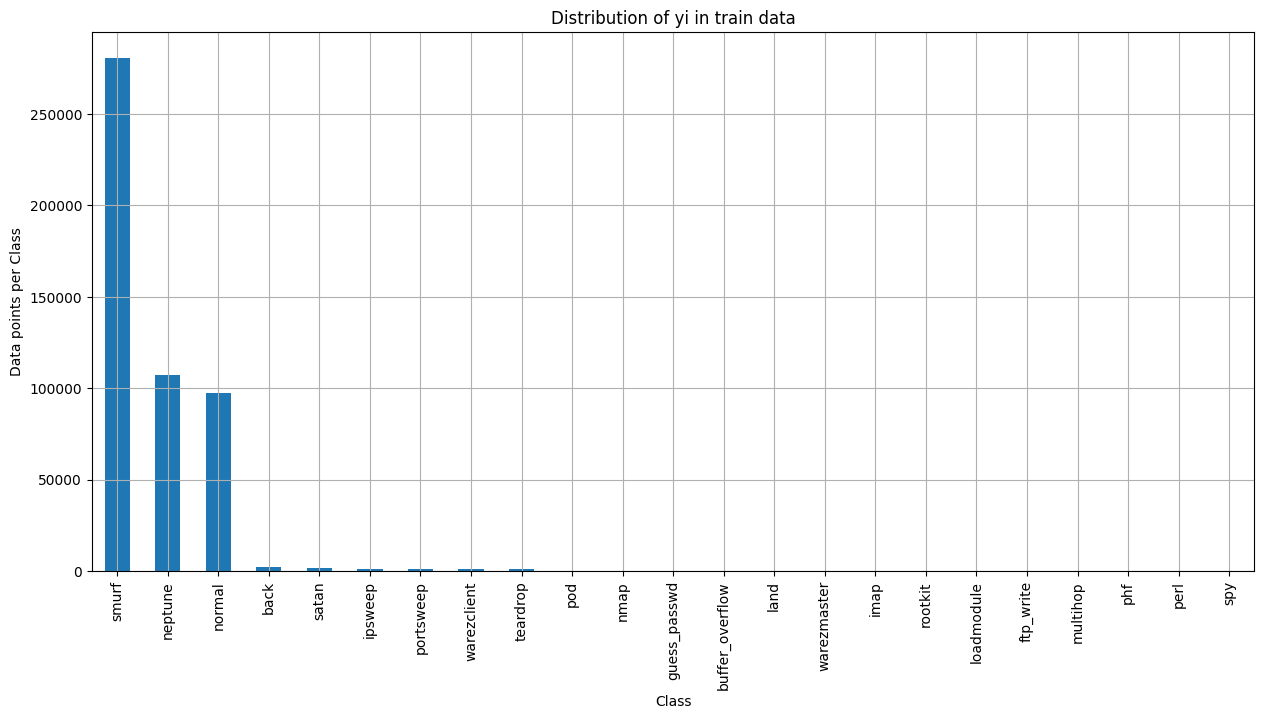

In [8]:
#Checking the Distribution of the attack types

plt.figure(figsize=(15,7))
class_distribution = dataset['label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

In [9]:
#Encoding the 'label' column such that Nomral : 0 and Everything Else is 1. 
#Using the replace method with a replace dictionary.

#Creating a copy of the dataset
df = pd.read_csv('kddcup99.csv')

df['label'].replace({
    'normal' : 0,
    'smurf' : 1,
    'neptune' : 1,
    'back' : 1,
    'satan' : 1,
    'ipsweep' : 1,
    'portsweep' : 1,
    'warezclient' : 1,
    'teardrop' : 1,
    'pod' : 1,
    'nmap' : 1,
    'guess_passwd' : 1,
    'buffer_overflow' : 1,
    'land' : 1,
    'warezmaster' : 1,
    'imap' : 1,
    'rootkit' : 1,
    'loadmodule' : 1,
    'ftp_write' : 1,
    'multihop' : 1,
    'phf' : 1,
    'perl' : 1,
    'spy' : 1
    
}, inplace = True)

df['label'].value_counts()

1    396743
0     97277
Name: label, dtype: int64

In [10]:
#Encoding the other categorical variables using Label Encoding from Scikit - Learn

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['protocol_type']  = le.fit_transform(df['protocol_type'])

df['service'] = le.fit_transform(df['service'])

df['flag'] = le.fit_transform(df['flag'])

df.head(20)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,0
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,0
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,0
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,0
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,0
5,0,1,22,9,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,0
6,0,1,22,9,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,0
7,0,1,22,9,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,0
8,0,1,22,9,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,0
9,0,1,22,9,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,0


In [11]:
#Ensuring all cloumns are numeric values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  int64  
 2   service                      494020 non-null  int64  
 3   flag                         494020 non-null  int64  
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [12]:
#Creating the Feature Set X and the Target Set Y using the Johnson's Algorithm.


cols = ['src_bytes','dst_bytes','count','srv_count','dst_host_srv_count','dst_host_same_src_port_rate','label']
df1 = df[cols]
df1.head() #New Dataframe according to Johnson's Algorithm

#Creating and the Feature and target Set
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

In [13]:
df1.tail(10)

,src_bytes,dst_bytes,count,srv_count,dst_host_srv_count,dst_host_same_src_port_rate,label
494010,308,662,8,10,255,0.03,0
494011,291,1862,10,11,255,0.02,0
494012,289,244,2,2,255,0.02,0
494013,306,662,2,2,255,0.02,0
494014,289,1862,4,12,255,0.01,0
494015,310,1881,4,5,255,0.01,0
494016,282,2286,6,6,255,0.17,0
494017,203,1200,6,18,255,0.06,0
494018,291,1200,6,12,255,0.04,0
494019,219,1234,6,35,255,0.17,0


In [14]:
df1 #We will use this dataframe to get the feature set and the target variable for our model

,src_bytes,dst_bytes,count,srv_count,dst_host_srv_count,dst_host_same_src_port_rate,label
0,181,5450,8,8,9,0.11,0
1,239,486,8,8,19,0.05,0
2,235,1337,8,8,29,0.03,0
3,219,1337,6,6,39,0.03,0
4,217,2032,6,6,49,0.02,0
...,...,...,...,...,...,...,...
494015,310,1881,4,5,255,0.01,0
494016,282,2286,6,6,255,0.17,0
494017,203,1200,6,18,255,0.06,0
494018,291,1200,6,12,255,0.04,0


In [15]:
#Splitting Into Train and Test Set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
print(X_train)

[[1.032e+03 0.000e+00 5.110e+02 5.110e+02 2.550e+02 1.000e+00]
 [1.032e+03 0.000e+00 5.110e+02 5.110e+02 2.550e+02 1.000e+00]
 [2.220e+02 1.295e+03 2.000e+00 2.000e+00 2.550e+02 5.000e-01]
 ...
 [5.200e+02 0.000e+00 5.110e+02 5.110e+02 2.550e+02 1.000e+00]
 [1.032e+03 0.000e+00 5.110e+02 5.110e+02 2.550e+02 1.000e+00]
 [0.000e+00 0.000e+00 2.550e+02 7.000e+00 7.000e+00 0.000e+00]]


In [17]:
print(X_test)

[[1.022e+03 3.890e+02 1.000e+00 1.000e+00 1.750e+02 1.000e-02]
 [3.760e+02 2.850e+02 2.000e+00 2.000e+00 2.550e+02 0.000e+00]
 [1.032e+03 0.000e+00 5.110e+02 5.110e+02 2.550e+02 1.000e+00]
 ...
 [1.032e+03 0.000e+00 5.080e+02 5.080e+02 2.550e+02 1.000e+00]
 [1.032e+03 0.000e+00 5.110e+02 5.110e+02 2.550e+02 1.000e+00]
 [2.230e+02 5.267e+03 2.000e+00 3.000e+00 2.550e+02 0.000e+00]]


In [18]:
print(y_train)

[1 1 0 ... 1 1 1]


In [19]:
print(y_test)

[0 0 1 ... 1 1 0]


In [20]:
df2 = df1.head(10000)

In [21]:
df2

,src_bytes,dst_bytes,count,srv_count,dst_host_srv_count,dst_host_same_src_port_rate,label
0,181,5450,8,8,9,0.11,0
1,239,486,8,8,19,0.05,0
2,235,1337,8,8,29,0.03,0
3,219,1337,6,6,39,0.03,0
4,217,2032,6,6,49,0.02,0
...,...,...,...,...,...,...,...
9995,1032,0,511,511,255,1.00,1
9996,1032,0,511,511,255,1.00,1
9997,1032,0,511,511,255,1.00,1
9998,1032,0,511,511,255,1.00,1


In [22]:
#Creating and the Feature and target Set for 10K Data
x1 = df2.iloc[:, :-1].values
y1 = df2.iloc[:, -1].values

In [23]:
print(x1)

[[1.810e+02 5.450e+03 8.000e+00 8.000e+00 9.000e+00 1.100e-01]
 [2.390e+02 4.860e+02 8.000e+00 8.000e+00 1.900e+01 5.000e-02]
 [2.350e+02 1.337e+03 8.000e+00 8.000e+00 2.900e+01 3.000e-02]
 ...
 [1.032e+03 0.000e+00 5.110e+02 5.110e+02 2.550e+02 1.000e+00]
 [1.032e+03 0.000e+00 5.110e+02 5.110e+02 2.550e+02 1.000e+00]
 [1.032e+03 0.000e+00 5.110e+02 5.110e+02 2.550e+02 1.000e+00]]


In [24]:
print(y1)

[0 0 0 ... 1 1 1]


In [25]:
#Splitting Into Train and Test Set for 10K

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.25, random_state = 0)

In [26]:
print(X_train1)

[[4.800e+02 5.485e+03 2.100e+01 2.100e+01 2.550e+02 0.000e+00]
 [2.010e+02 6.329e+03 9.000e+00 9.000e+00 2.550e+02 0.000e+00]
 [2.310e+02 7.560e+02 2.700e+01 2.700e+01 2.550e+02 4.000e-02]
 ...
 [3.260e+02 1.372e+03 9.000e+00 3.500e+01 2.550e+02 1.100e-01]
 [1.032e+03 0.000e+00 5.110e+02 5.110e+02 2.550e+02 1.000e+00]
 [2.030e+02 3.543e+03 1.600e+01 1.800e+01 2.550e+02 1.000e-02]]


In [27]:
print(X_test1)

[[1.032e+03 0.000e+00 5.110e+02 5.110e+02 2.550e+02 1.000e+00]
 [3.050e+02 2.101e+03 1.400e+01 1.400e+01 2.550e+02 3.000e-02]
 [1.750e+02 4.260e+02 1.200e+01 1.200e+01 2.550e+02 0.000e+00]
 ...
 [2.040e+02 2.654e+03 1.000e+00 3.000e+00 2.550e+02 3.000e-02]
 [2.330e+02 2.800e+02 4.000e+00 5.000e+00 2.550e+02 0.000e+00]
 [2.030e+02 3.010e+02 2.000e+00 5.000e+00 2.550e+02 2.500e-01]]


In [28]:
print(y_train1)

[0 0 0 ... 0 1 0]


In [29]:
print(y_test1)

[1 0 0 ... 0 0 0]


In [30]:
from sklearn import preprocessing

X_train1 = preprocessing.scale(X_train1)

X_test1 = preprocessing.scale(X_test1)

In [31]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train1, y_train1)

SVC(random_state=0)

In [32]:
#Predicting the values

y_pred = classifier.predict(X_test1)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test1.reshape(len(y_test1),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [33]:
#Checking the accuracy

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test1, y_pred)
print(cm)
accuracy_score(y_test1, y_pred)

[[1939    0]
 [   1  560]]


0.9996

In [34]:
#Testing on random data with model trainded on 10K sub data set

print(classifier.predict(preprocessing.scale([[219,1234,6,35,255,0.17]])))

[0]


## Checking with 20K Values

In [35]:
df1

,src_bytes,dst_bytes,count,srv_count,dst_host_srv_count,dst_host_same_src_port_rate,label
0,181,5450,8,8,9,0.11,0
1,239,486,8,8,19,0.05,0
2,235,1337,8,8,29,0.03,0
3,219,1337,6,6,39,0.03,0
4,217,2032,6,6,49,0.02,0
...,...,...,...,...,...,...,...
494015,310,1881,4,5,255,0.01,0
494016,282,2286,6,6,255,0.17,0
494017,203,1200,6,18,255,0.06,0
494018,291,1200,6,12,255,0.04,0


In [36]:
df3 = df1.head(20000)

In [37]:
df3

,src_bytes,dst_bytes,count,srv_count,dst_host_srv_count,dst_host_same_src_port_rate,label
0,181,5450,8,8,9,0.11,0
1,239,486,8,8,19,0.05,0
2,235,1337,8,8,29,0.03,0
3,219,1337,6,6,39,0.03,0
4,217,2032,6,6,49,0.02,0
...,...,...,...,...,...,...,...
19995,294,333,2,5,255,0.03,0
19996,302,1261,6,8,255,0.02,0
19997,272,4841,2,3,255,0.02,0
19998,277,525,2,2,255,0.01,0


In [38]:
#Creating and the Feature and target Set for 20K Data
x2 = df3.iloc[:, :-1].values
y2 = df3.iloc[:, -1].values

In [39]:
x2

array([[1.810e+02, 5.450e+03, 8.000e+00, 8.000e+00, 9.000e+00, 1.100e-01],
       [2.390e+02, 4.860e+02, 8.000e+00, 8.000e+00, 1.900e+01, 5.000e-02],
       [2.350e+02, 1.337e+03, 8.000e+00, 8.000e+00, 2.900e+01, 3.000e-02],
       ...,
       [2.720e+02, 4.841e+03, 2.000e+00, 3.000e+00, 2.550e+02, 2.000e-02],
       [2.770e+02, 5.250e+02, 2.000e+00, 2.000e+00, 2.550e+02, 1.000e-02],
       [1.860e+02, 4.841e+03, 2.000e+00, 3.000e+00, 2.550e+02, 1.000e-02]])

In [40]:
y2

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.25, random_state = 0)

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

In [44]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train2, y_train2)

SVC(random_state=0)

In [45]:
y_pred2 = classifier.predict(X_test2)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test2.reshape(len(y_test2),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test2, y_pred2)
print(cm)
accuracy_score(y_test2, y_pred2)

[[4062    0]
 [  21  917]]


0.9958

## Checking with 40K Dataset

In [47]:
df1

,src_bytes,dst_bytes,count,srv_count,dst_host_srv_count,dst_host_same_src_port_rate,label
0,181,5450,8,8,9,0.11,0
1,239,486,8,8,19,0.05,0
2,235,1337,8,8,29,0.03,0
3,219,1337,6,6,39,0.03,0
4,217,2032,6,6,49,0.02,0
...,...,...,...,...,...,...,...
494015,310,1881,4,5,255,0.01,0
494016,282,2286,6,6,255,0.17,0
494017,203,1200,6,18,255,0.06,0
494018,291,1200,6,12,255,0.04,0


In [50]:
df4 = df1.head(40000)

In [51]:
df4

,src_bytes,dst_bytes,count,srv_count,dst_host_srv_count,dst_host_same_src_port_rate,label
0,181,5450,8,8,9,0.11,0
1,239,486,8,8,19,0.05,0
2,235,1337,8,8,29,0.03,0
3,219,1337,6,6,39,0.03,0
4,217,2032,6,6,49,0.02,0
...,...,...,...,...,...,...,...
39995,54540,8314,5,5,255,0.00,1
39996,54540,8314,6,6,255,0.00,1
39997,54540,8314,6,6,255,0.00,1
39998,54020,7300,7,7,255,0.00,1


In [52]:
#Creating and the Feature and target Set for 20K Data
x4 = df4.iloc[:, :-1].values
y4 = df4.iloc[:, -1].values

In [53]:
from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size = 0.25, random_state = 0)

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train4 = sc.fit_transform(X_train4)
X_test4 = sc.transform(X_test4)

In [55]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train4, y_train4)

SVC(random_state=0)

In [56]:
y_pred4 = classifier.predict(X_test4)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test4.reshape(len(y_test4),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test4, y_pred4)
print(cm)
accuracy_score(y_test4, y_pred4)

[[8931    3]
 [  52 1014]]


0.9945

### Creating and Plotting the results

In [59]:
data = {
    'Data_Size' : ['10K','20K','40K'],
    'Accuracy Score' : [0.9996 , 0.9958, 0.9945]
}

result_df = pd.DataFrame(data)
result_df

,Data_Size,Accuracy Score
0,10K,0.9996
1,20K,0.9958
2,40K,0.9945
